<a href="https://colab.research.google.com/github/abhi-11nav/Cricket-Stroke-recognition/blob/main/Cricket_Stroke_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importiing basic libraries

import numpy as np 
import pandas as pd

In [2]:
!git clone https://github.com/abhi-11nav/Cricket-Stroke-recognition.git

Cloning into 'Cricket-Stroke-recognition'...
remote: Enumerating objects: 4761, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 4761 (delta 12), reused 0 (delta 0), pack-reused 4738
Receiving objects: 100% (4761/4761), 644.68 MiB | 25.68 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (4728/4728), done.


In [3]:
!nvidia-smi

Mon Nov  7 19:37:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import cv2

### STROKES TO BE RECOGNIZED BY THE MODEL

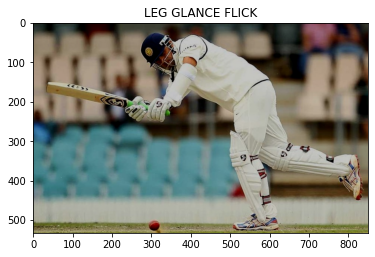

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

plt.title("LEG GLANCE FLICK")
leg_glance_flick = "/content/Cricket-Stroke-recognition/data/legglance-flick/legglance100.png"
img = mpimg.imread(leg_glance_flick)

plt.imshow(img)
plt.show()

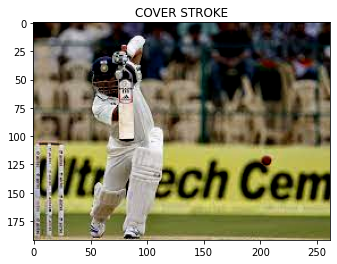

In [6]:
cover_stroke = "/content/Cricket-Stroke-recognition/data/drive/drives1.png"

plt.title("COVER STROKE")
img = mpimg.imread(cover_stroke)
plt.imshow(img)

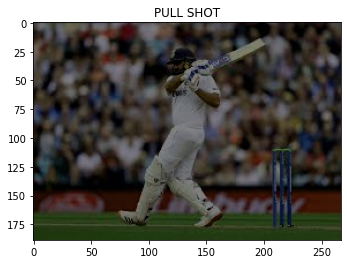

In [7]:
pull_shot = "/content/Cricket-Stroke-recognition/data/pullshot/pullshot1.png"

plt.title("PULL SHOT")
img = mpimg.imread(pull_shot)
plt.imshow(img)

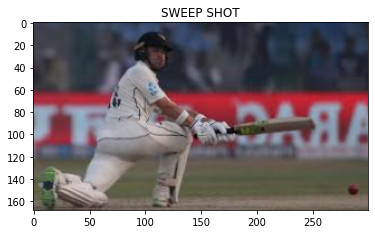

In [8]:
sweep_shot = "/content/Cricket-Stroke-recognition/data/sweep/sweep1002.png"

plt.title("SWEEP SHOT")
img = mpimg.imread(sweep_shot)
plt.imshow(img)

In [9]:
array_ = (np.dot(cv2.imread(sweep_shot),np.array([[1,0,-1], [1,0,-1], [1,0,-1]])) * 0.5) + 160
array_ = (np.dot(cv2.imread(sweep_shot),np.array([[1,0,-1], [1,0,-1], [1,0,-1]])) * 0.6) + 12

In [10]:
from keras import activations

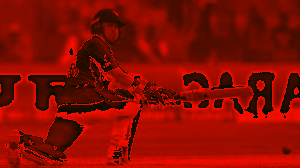

In [11]:
# Experimentation with random filter

import cv2
from PIL import Image
import numpy as np

Image.fromarray(np.uint8(activations.relu(array_,)))

### BULIDING THE MODEL

#### WE WILL CREATE OUR OWN CONVOLUTION NERUAL NETWORK BEFORE USING PRE-TRAINED MODEL

In [12]:
# CNN Model using Functional API 

input_layer = keras.layers.Input(shape=[224,224,3])
first_layer = keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu")(input_layer) 
#second_layer = keras.layers.MaxPool2D(pool_size=2) (first_layer)
third_layer = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",activation="relu")(first_layer)
fourth_layer = keras.layers.MaxPool2D(pool_size=2)(third_layer)
fifth_layer = keras.layers.Conv2D(filters=128,kernel_size=3, padding="same",activation="relu")(fourth_layer)
#sixth_layer = keras.layers.MaxPool2D(pool_size=2)(fifth_layer)
seventh_layer = keras.layers.Conv2D(filters=128,kernel_size=3, padding="same",activation="relu")(fifth_layer)
eight_layer = keras.layers.MaxPool2D(pool_size=2)(seventh_layer)
ninth_layer = keras.layers.Conv2D(filters=256,kernel_size=3, padding="same",activation="relu")(eight_layer)
#tenth_layer = keras.layers.MaxPool2D(pool_size=2)(ninth_layer)
eleventh_layer = keras.layers.Conv2D(filters=256,kernel_size=3, padding="same",activation="relu")(ninth_layer)
twelve_layer = keras.layers.MaxPool2D(pool_size=2)(eleventh_layer)
thirteen_layer = keras.layers.Conv2D(filters=512,kernel_size=3, padding="same",activation="relu")(twelve_layer)
#fourteen_layer = keras.layers.MaxPool2D(pool_size=2)(thirteen_layer)
fifteen_layer = keras.layers.Conv2D(filters=512,kernel_size=3, padding="same",activation="relu")(thirteen_layer)
sixteen_layer = keras.layers.MaxPool2D(pool_size=2)(fifteen_layer)
seventeen_layer = Flatten()(sixteen_layer)
prediction_layer = Dense(4, activation="softmax")(seventeen_layer)

NameError: ignored

In [ ]:
model = Model(inputs = input_layer, outputs = prediction_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

In [ ]:
# Activation function and learning rate 

optimizer = keras.optimizers.Adam(learning_rate=0.2)


model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics="accuracy")

# DATA AUGMENTATION AND PREPROCESSING

In [64]:
# Splitting the data into train and test 

image_directory = "/content/Cricket-Stroke-recognition/data"

# Directory where the training data will be stored
!mkdir split_data

train_directory = "/content/split_data"

In [65]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import splitfolders

# Splitting the data according to ratios (90 percent to training data and 10 percent for validation)

splitfolders.ratio(image_directory, # The location of dataset
                   output=train_directory, # The output location
                   ratio=(.9,.1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=True # If you choose to move, turn this into True
                   )

Copying files: 4724 files [00:00, 11523.00 files/s]


In [67]:
# Split data paths 

train_path = "/content/split_data/train"

test_path = "/content/split_data/val"

In [68]:
# Image augmentation parameteres 

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [69]:
training_data = train_datagen.flow_from_directory(train_path, target_size=(224,224), class_mode="categorical", batch_size=16)
validation_data = test_datagen.flow_from_directory(test_path, target_size=(224,224), class_mode="categorical", batch_size=16)

Found 4250 images belonging to 4 classes.
Found 473 images belonging to 4 classes.


## TRANSFER LEARNING

In [70]:
# Importing necessary libraries 

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Normalization, Conv2D, InputLayer, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential 
from tensorflow.keras.applications.resnet50 import ResNet50
from glob import glob

In [71]:
# Loading the pretrained model

model = ResNet50(include_top=False,weights='imagenet',input_shape=[224,224,3])

In [72]:
# Let us not re-train the model again. We will be using the existing weights 

for layers in model.layers:
  layers.trainable = False

In [84]:
# Number of output classes
class_count = len(glob(train_path+"/*"))


# Adding the final layers 

flatten = Flatten()(model.output)

prediction__layer = (Dense(class_count, activation='sigmoid'))(flatten)

In [85]:
# Creating the final model with inputs and outputs 

model = Model(inputs = model.inputs, outputs = prediction__layer)

In [86]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [88]:
# Importing library for activation functions
from keras.optimizers import Adam 

# We will have an adaptive learning rate for Adam optimizer
learning_rate = 1e-3
epochs = 25
decay = learning_rate/epochs
activation_function = Adam(learning_rate=learning_rate, epsilon=1e-08, decay=decay)

In [89]:
model.compile(optimizer=activation_function,loss ='categorical_crossentropy', metrics='accuracy')

#### Exploring the images through activations before fitting the model

In [97]:
# Importing necessary libraries

import cv2

In [100]:
img = cv2.imread("/content/split_data/val/legglance-flick/legglance1030.png")

In [101]:
# Reshaping the image to match the input size of the neural network 

img = cv2.resize(img, [224,224])

In [102]:
# Empty list 
layer_names = []

In [103]:
for layers in model.layers:
  layer_names.append(layers.name)

In [ ]:
layer_names

In [105]:
import numpy as np 

In [106]:
img_tensor = np.expand_dims(img,axis=0)

In [107]:
img_tensor.shape

(1, 224, 224, 3)

In [108]:
layer_outputs = [layer.output for layer in model.layers]

In [109]:
activation_model = Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 27s 27s/step


In [110]:
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


IndexError: ignored

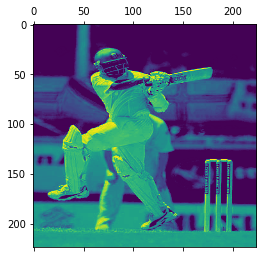

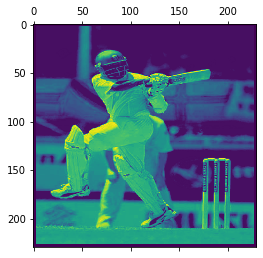

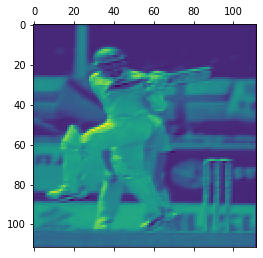

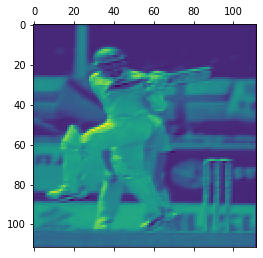

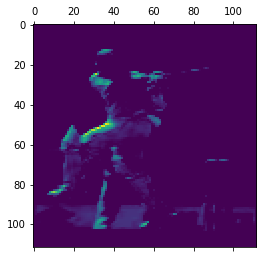

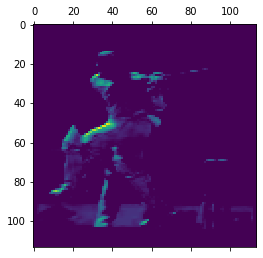

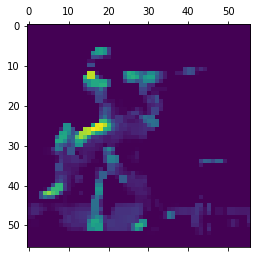

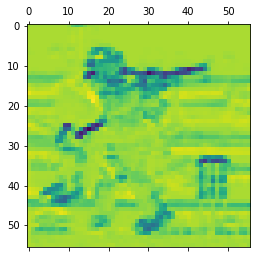

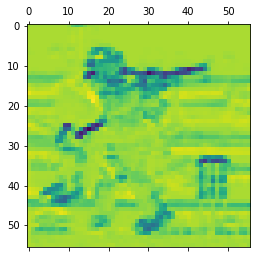

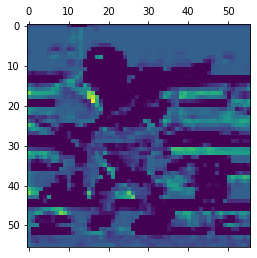

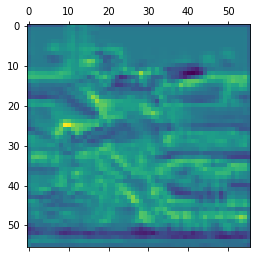

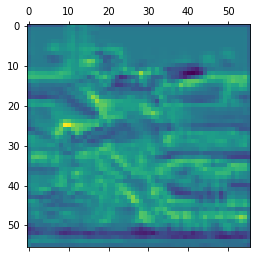

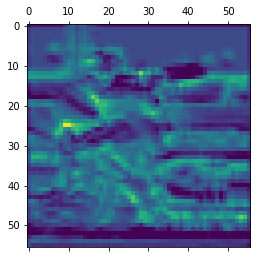

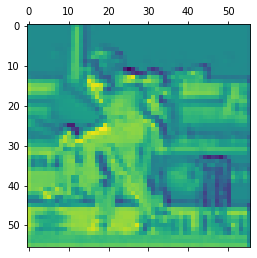

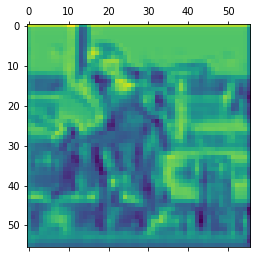

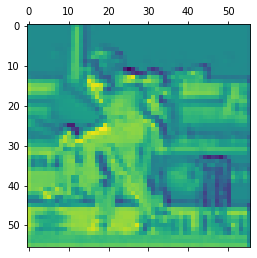

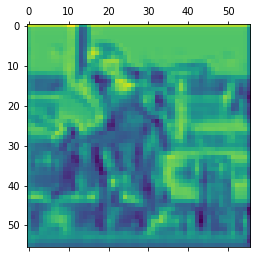

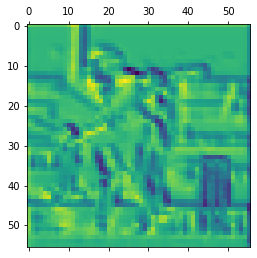

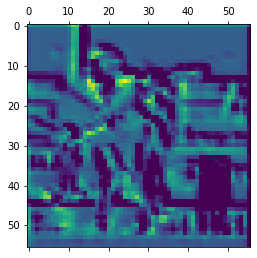

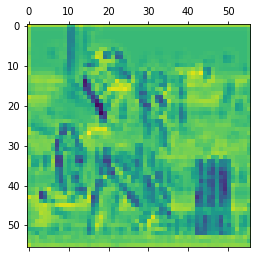

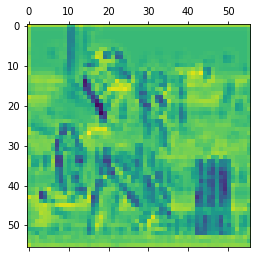

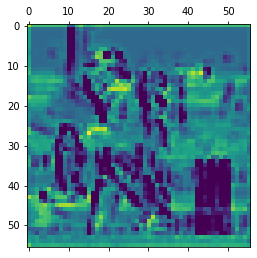

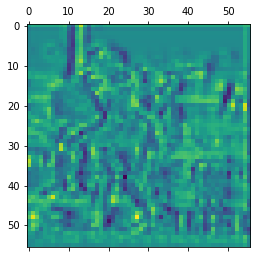

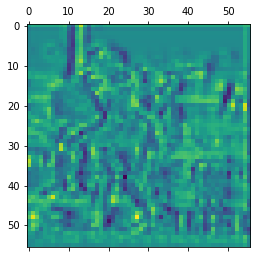

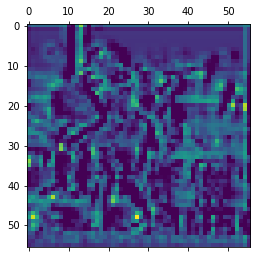

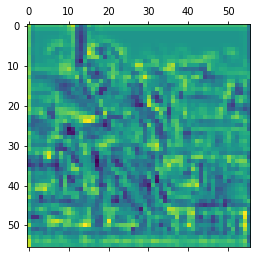

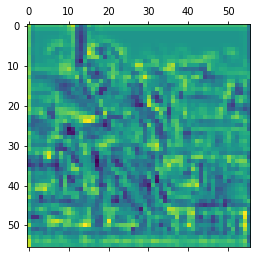

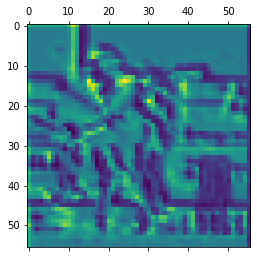

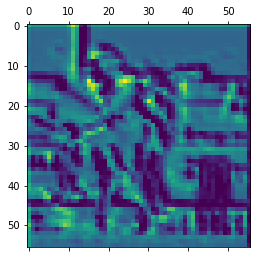

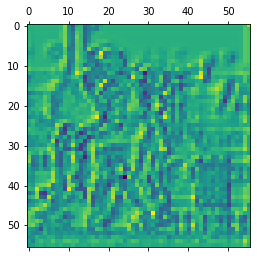

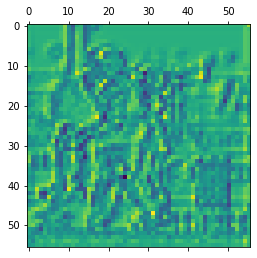

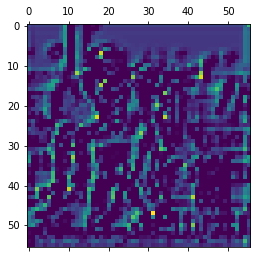

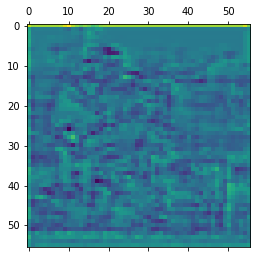

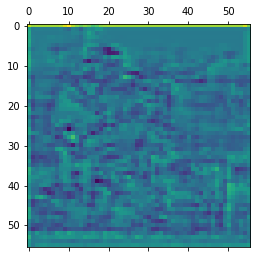

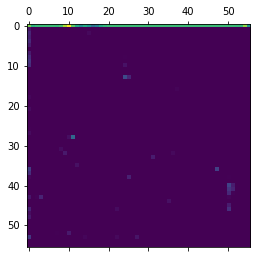

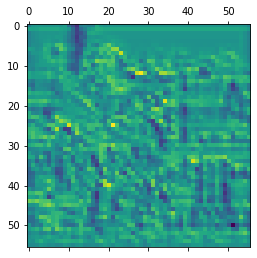

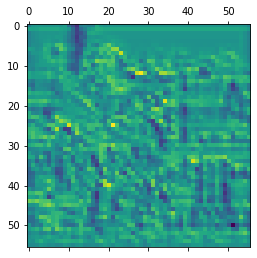

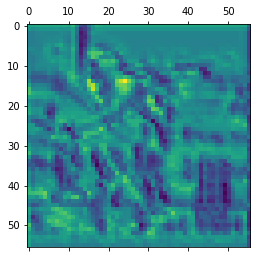

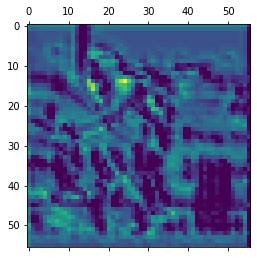

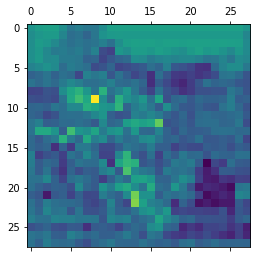

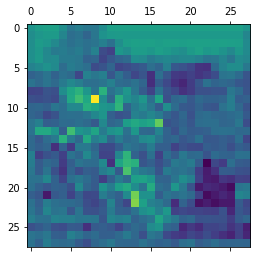

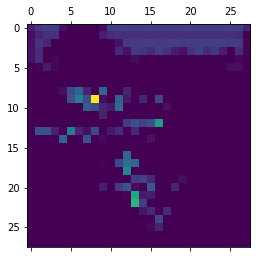

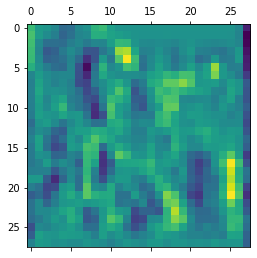

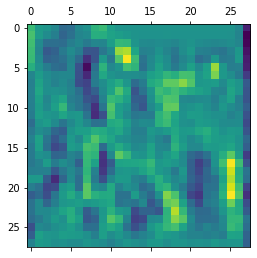

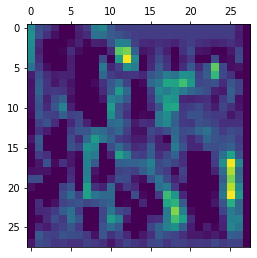

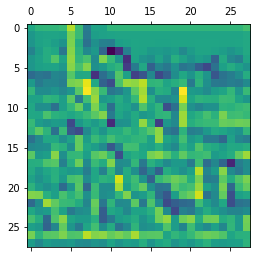

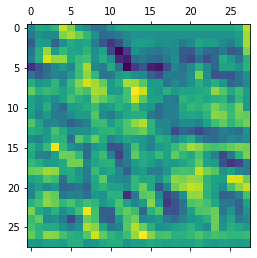

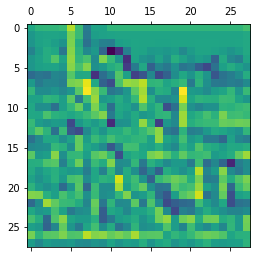

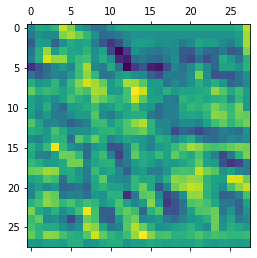

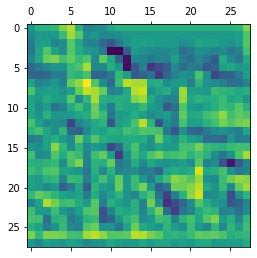

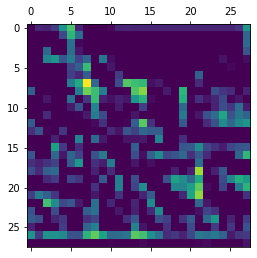

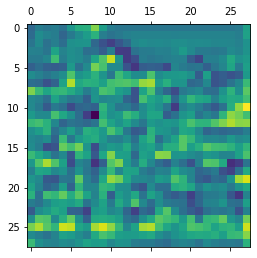

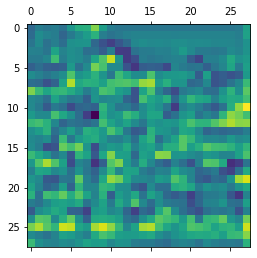

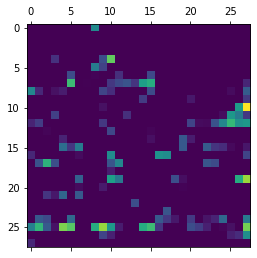

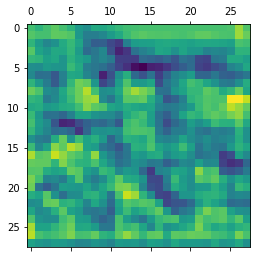

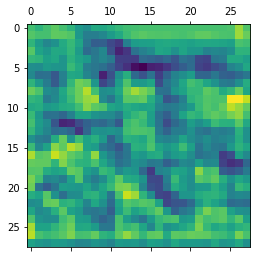

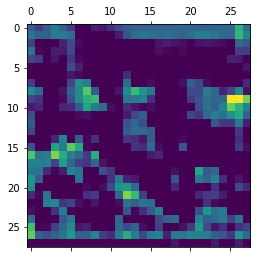

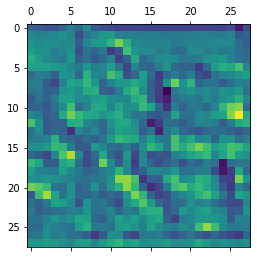

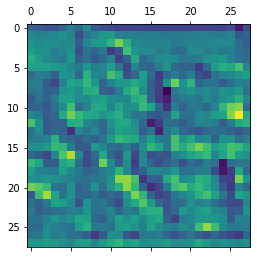

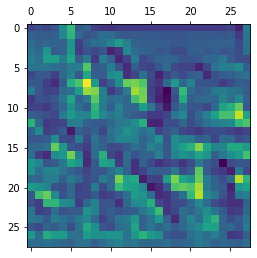

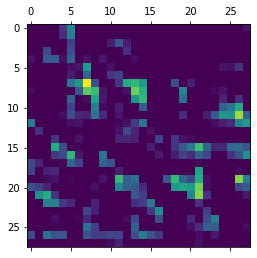

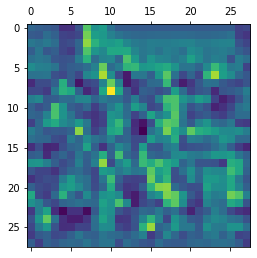

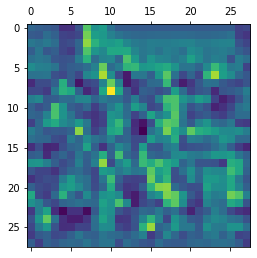

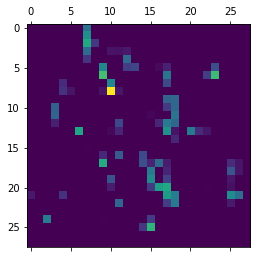

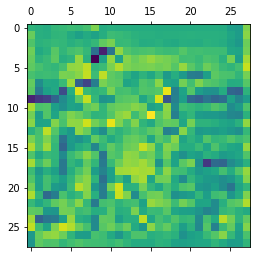

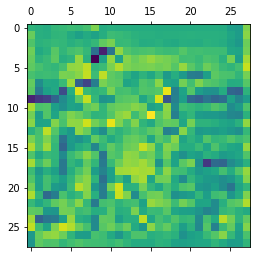

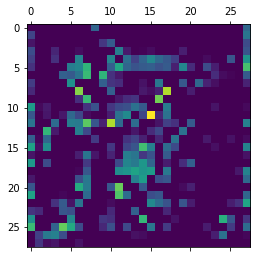

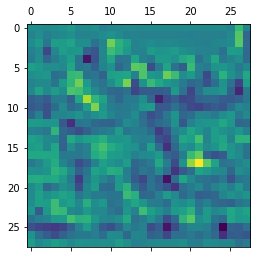

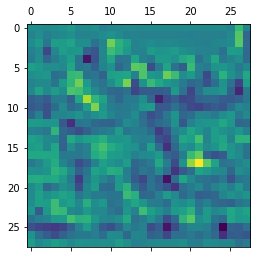

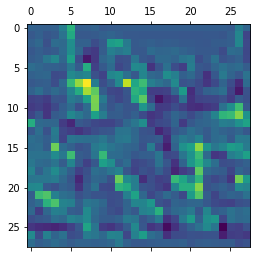

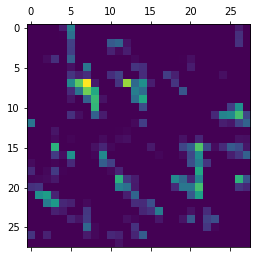

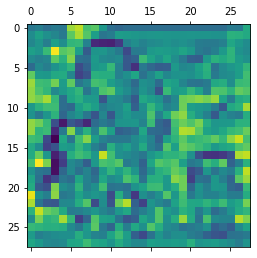

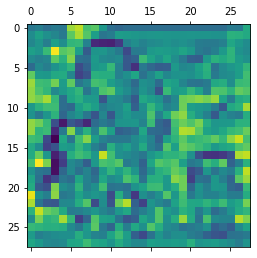

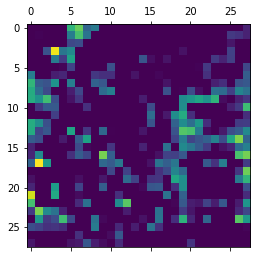

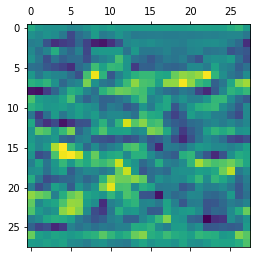

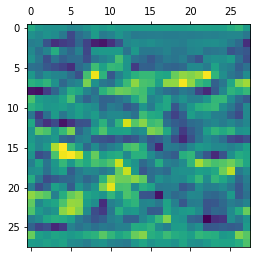

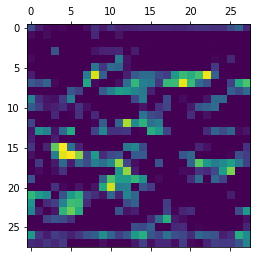

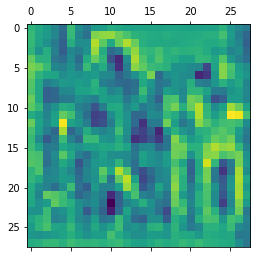

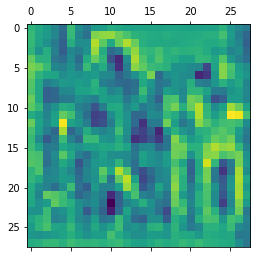

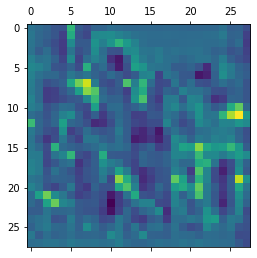

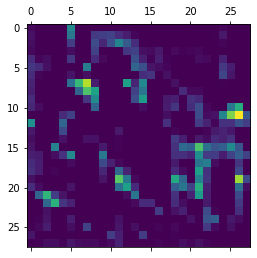

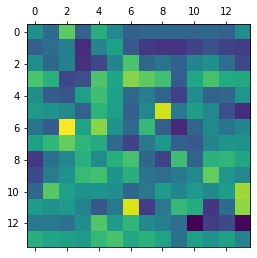

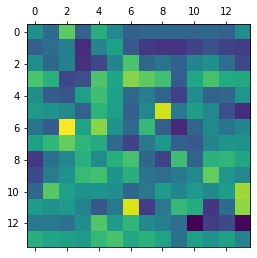

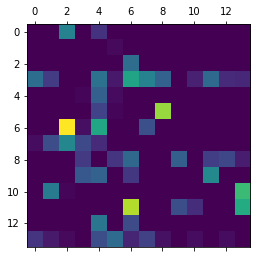

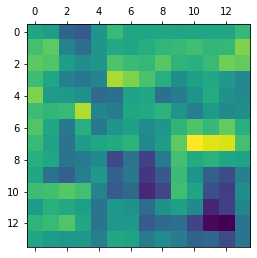

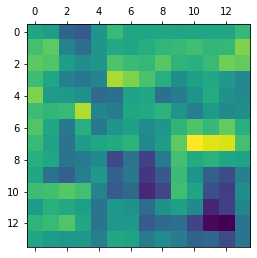

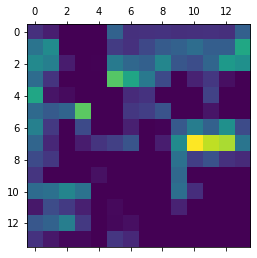

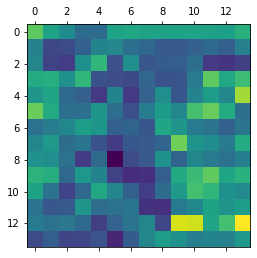

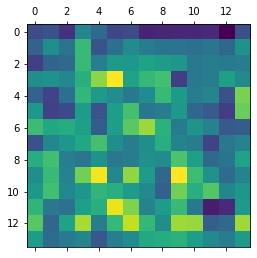

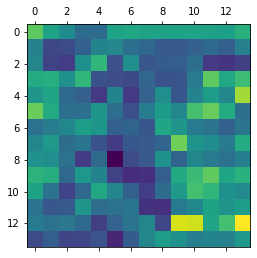

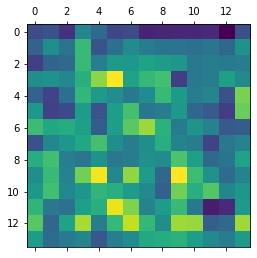

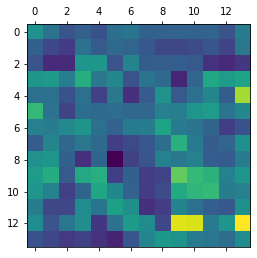

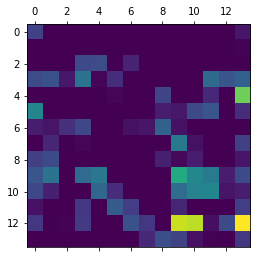

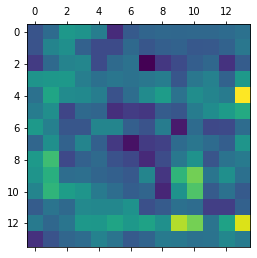

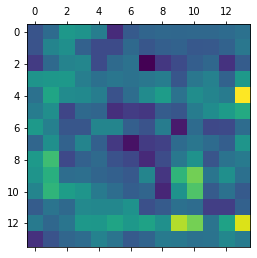

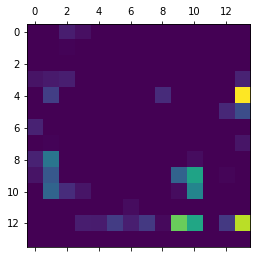

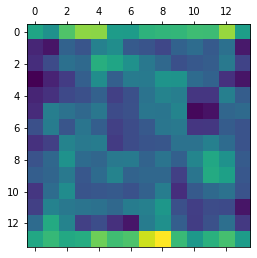

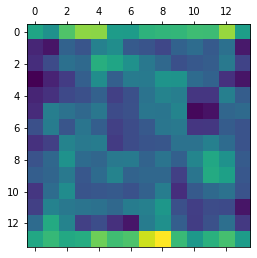

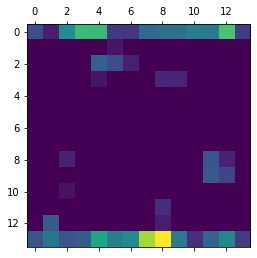

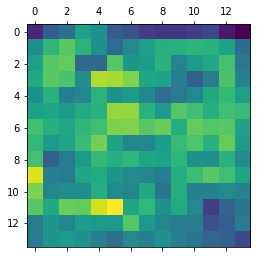

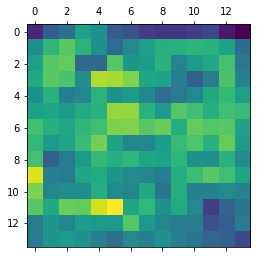

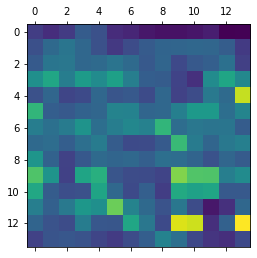

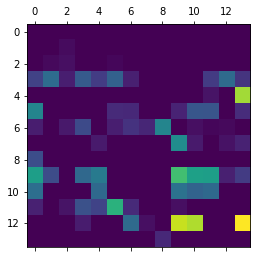

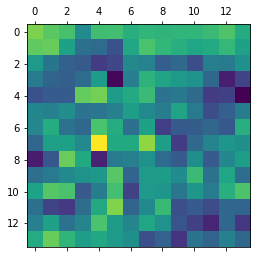

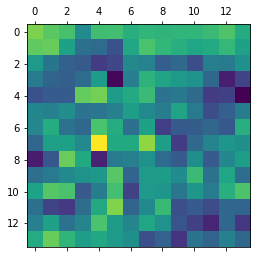

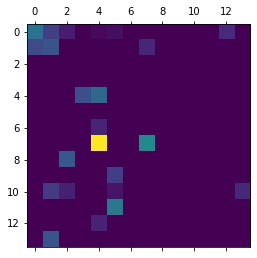

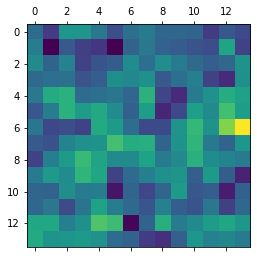

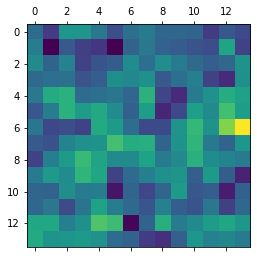

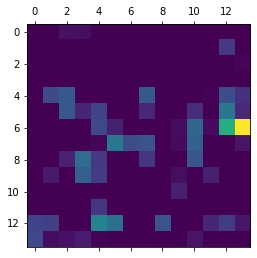

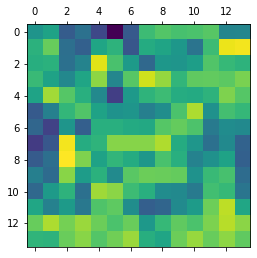

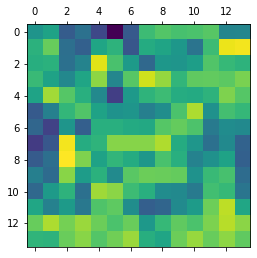

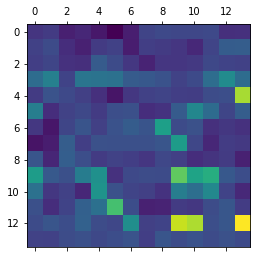

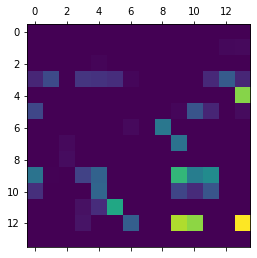

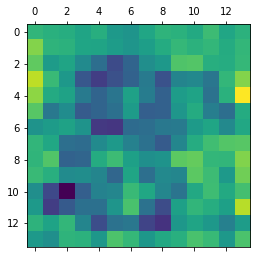

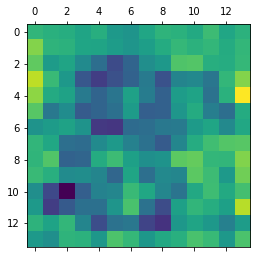

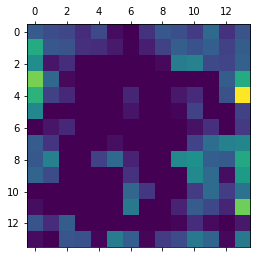

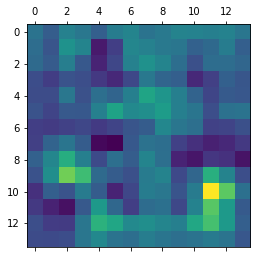

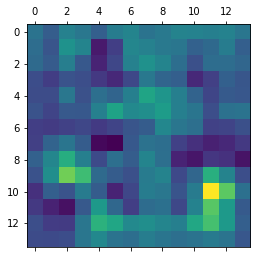

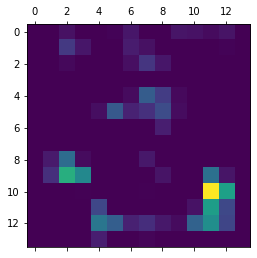

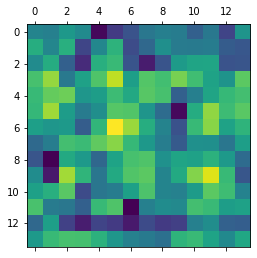

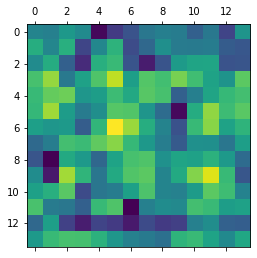

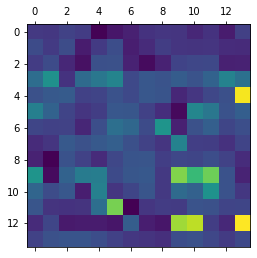

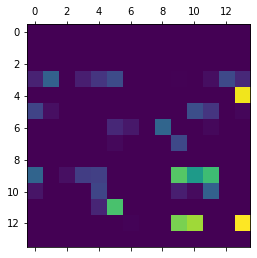

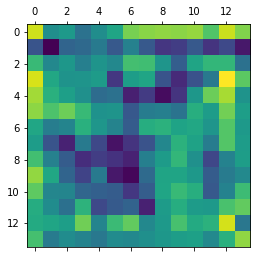

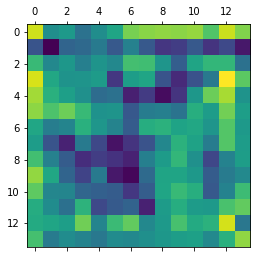

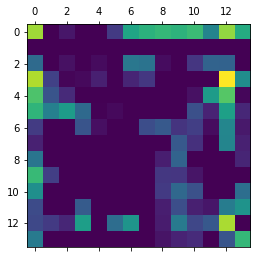

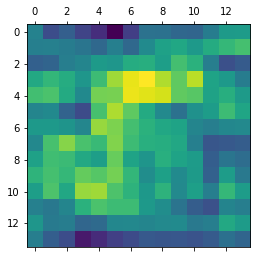

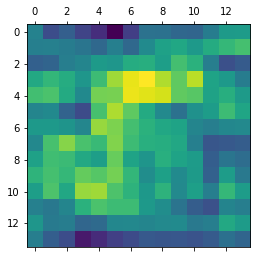

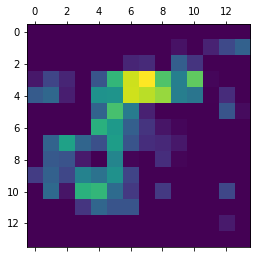

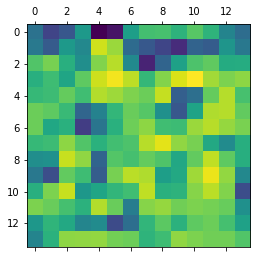

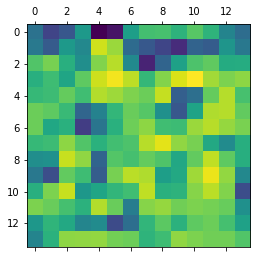

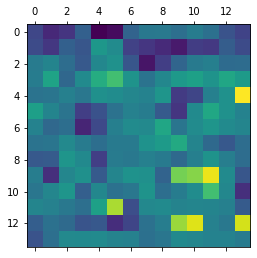

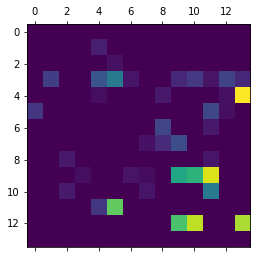

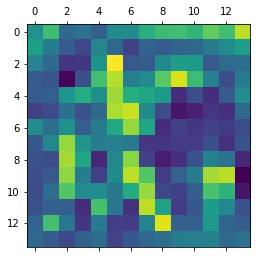

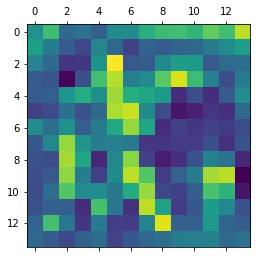

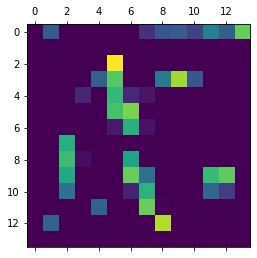

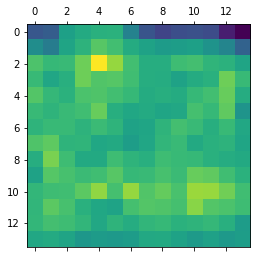

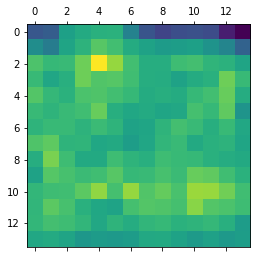

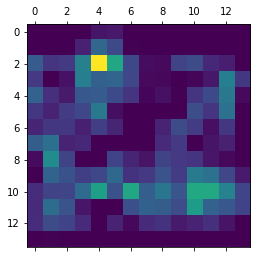

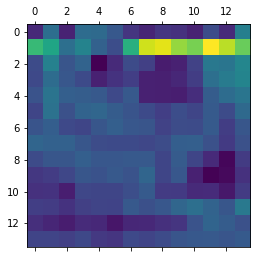

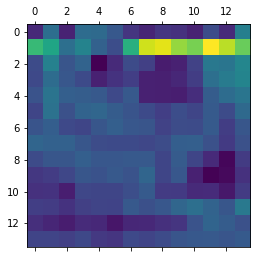

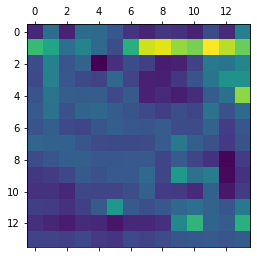

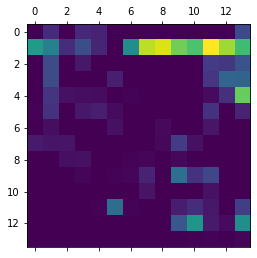

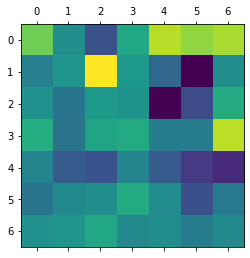

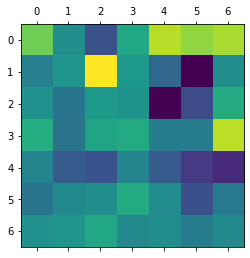

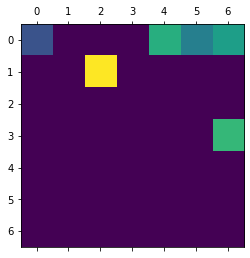

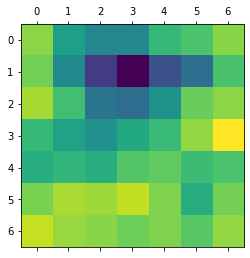

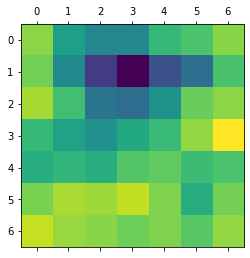

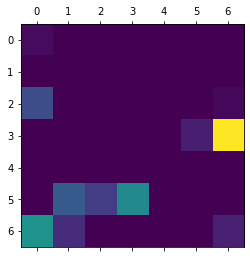

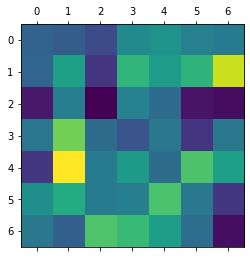

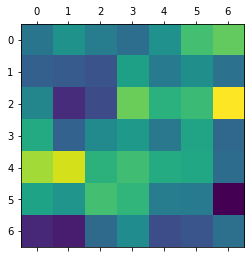

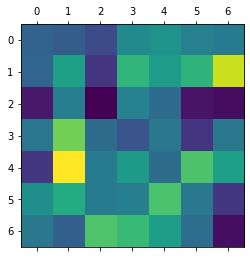

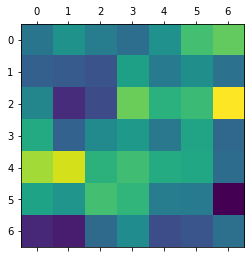

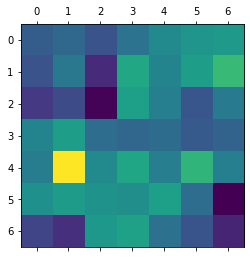

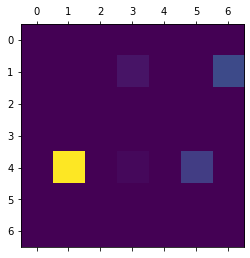

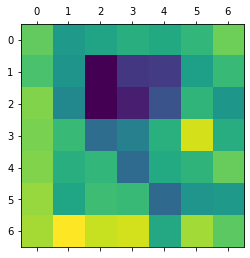

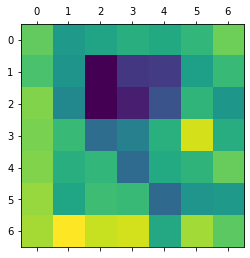

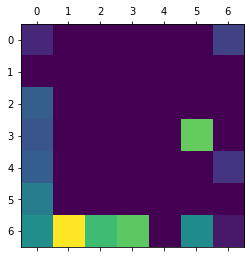

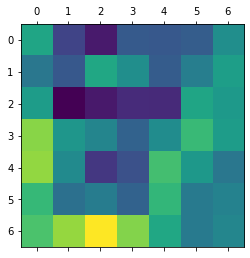

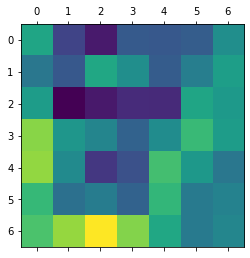

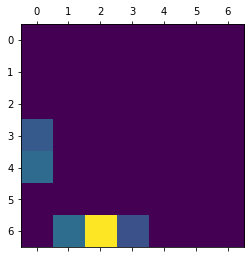

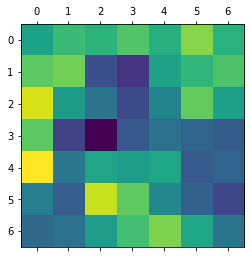

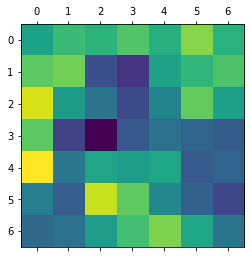

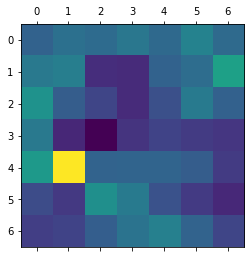

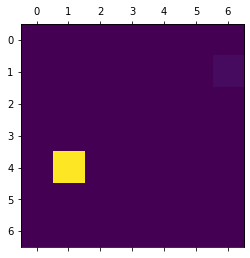

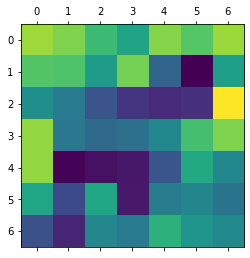

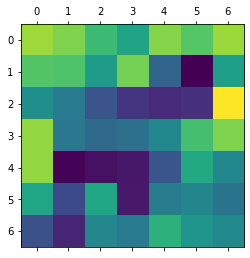

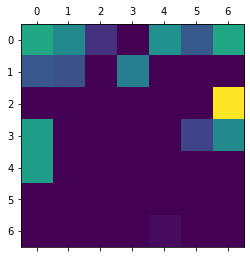

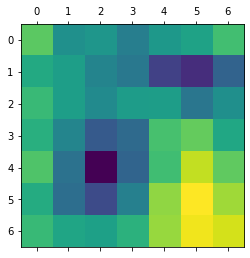

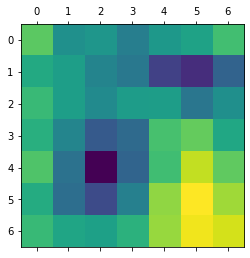

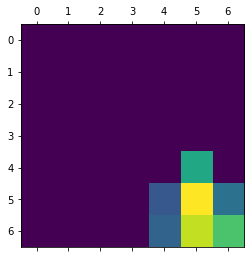

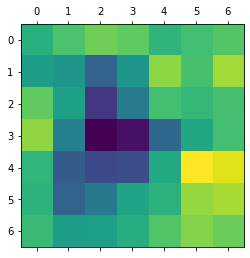

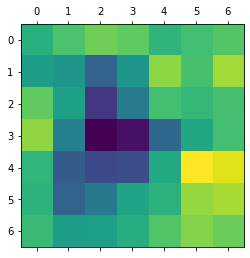

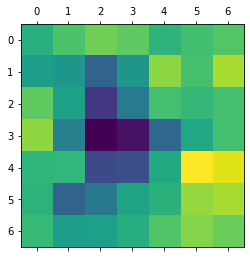

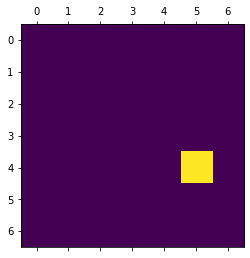

In [111]:
for i in range(0,len(activations)):
  plt.matshow(activations[i][0, :, :, 2], cmap ='viridis')

.

## Fitting data to the model

In [91]:
history = model.fit(training_data, validation_data=validation_data, epochs=epochs)

Epoch 1/25
266/266 [==============================] - 71s 266ms/step - loss: 1.9275 - accuracy: 0.3828 - val_loss: 1.6791 - val_accuracy: 0.3996
Epoch 2/25
266/266 [==============================] - 71s 268ms/step - loss: 1.7183 - accuracy: 0.4501 - val_loss: 1.3704 - val_accuracy: 0.4778
Epoch 3/25
266/266 [==============================] - 69s 259ms/step - loss: 1.5339 - accuracy: 0.4911 - val_loss: 1.8269 - val_accuracy: 0.4271
Epoch 4/25
266/266 [==============================] - 68s 257ms/step - loss: 1.4689 - accuracy: 0.5155 - val_loss: 1.8660 - val_accuracy: 0.4841
Epoch 5/25
266/266 [==============================] - 68s 256ms/step - loss: 1.2692 - accuracy: 0.5499 - val_loss: 1.7269 - val_accuracy: 0.4778
Epoch 6/25
266/266 [==============================] - 69s 259ms/step - loss: 1.2900 - accuracy: 0.5687 - val_loss: 1.1064 - val_accuracy: 0.6237
Epoch 7/25
266/266 [==============================] - 68s 256ms/step - loss: 1.1325 - accuracy: 0.5946 - val_loss: 1.0546 - val_ac

In [92]:
model.predict(cv2.imread(sweep_shot))

ValueError: ignored

In [114]:
model.save("model.h5")

# OBJECT DETECTION API 

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 1.7 MB 48.6 MB/s 
     |████████████████████████████████| 438 kB 70.8 MB/s 
     |████████████████████████████████| 5.9 MB 57.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.9.2


In [ ]:
# Cloning the tensorflow - object detection 2.0 repository 

!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 78544, done.
remote: Counting objects: 100% (347/347), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 78544 (delta 171), reused 292 (delta 144), pack-reused 78197
Receiving objects: 100% (78544/78544), 593.72 MiB | 25.99 MiB/s, done.
Resolving deltas: 100% (55794/55794), done.


In [ ]:
# Changing the working directory to install protobuf
cd models/research

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 19.98 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [ ]:
cp -r pycocotools /content/models/research

.

## Installing the Object Detection API

In [ ]:
# Set the current direcotry to reserach folder before executing this command. 

!cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install --use-feature=2020-resolver .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 16.3 MB/s 
     |████████████████████████████████| 352 kB 59.2 MB/s 
     |████████████████████████████████| 2.2 MB 51.9 MB/s 
     |████████████████████████████████| 25.0 MB 1.4 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 116 kB 72.9 MB/s 
     |████████████████████████████████| 636 kB 67.6 MB/s 
     |████████████████████████████████| 38.2 MB 86 kB/s 
     |█

In [ ]:
# Testing the installation

!python object_detection/builders/model_builder_tf2_test.py

2022-11-06 20:52:37.750081: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-06 20:52:39.405370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-11-06 20:52:39.405612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-11-06 20:52:39.405644: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you woul